In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file1=r"C:\Users\surya\Downloads\Python files\Visadataset.csv"
visa_df=pd.read_csv(file1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# **Bi_Variant_Analysis**
- Categorical vs Categorical
- continent
- case_status
- as we know that there are 25480 observations are there
- in that 16k are from asia applicants
-out of 16k applicants we need to find 
    - how many applicants are approved(certified)
    - how many applicants are rejected(denied)

# **Categorical vs Categorical**

In [6]:
c1=visa_df['continent']== 'Asia'
c2=visa_df['case_status'] == 'Certified'
con=c1 & c2
certified_count=len(visa_df[con])
print(f"Number of visas certified from asia is -----> {certified_count}")

Number of visas certified from asia is -----> 11012


In [7]:
c1=visa_df['continent']== 'Asia'
c2=visa_df['case_status'] == 'Denied'
con=c1 & c2
denied_count=len(visa_df[con])
print(f"Number of visas denied from asia is -----> {denied_count}")

Number of visas certified from asia is -----> 5849


In [9]:
# find count of certified and denied visas from asia
c1=visa_df['continent']== 'Asia'
c2=visa_df['case_status'] == 'Certified'
c3=visa_df['case_status'] == 'Denied'
con1=c1 & c2
con2=c1&c3
certified_count=len(visa_df[con1])
denied_count=len(visa_df[con2])
print(f"Number of visas certified from asia is -----> {certified_count}")
print(f"Number of visas denied from asia is -----> {denied_count}")

Number of visas certified from asia is -----> 11012
Number of visas denied from asia is -----> 5849


In [18]:
# create a df
# continent denied certified


# make unique_labels
# create 2 empty lists
# iterate through loop

unique_values=visa_df['continent'].value_counts().keys()
unique_values

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [ ]:
# Traditional method
# we can get all this by using pd.crosstab()

In [25]:
unique_values=visa_df['continent'].unique()
# we can use .unique() or .value_counts.keys()   ---------------> to get unique labels in a particular column

#unique_values=visa_df['continent'].value_counts().keys()

certified_count=[]
denied_count=[]
for i in unique_values:
    c1=visa_df['continent']== i
    c2=visa_df['case_status'] == 'Certified'
    c3=visa_df['case_status'] == 'Denied'
    con1=c1 & c2
    con2=c1&c3
    certified_count.append(len(visa_df[con1]))
    denied_count.append(len(visa_df[con2]))
df1=pd.DataFrame(zip(unique_values,certified_count,denied_count),columns=['Continent','Certified_visa_count','Denied_visa_count'])
df1

,Continent,Certified_visa_count,Denied_visa_count
0,Asia,11012,5849
1,Europe,2957,775
2,North America,2037,1255
3,South America,493,359
4,Africa,397,154
5,Oceania,122,70


In [24]:
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [31]:
# df1.set_index() -------------------> will set the sepecified column as index

df1.set_index('Continent')

,Certified_visa_count,Denied_visa_count
Continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


In [ ]:
# pd.crosstab()

- will take two arguements
    - index
    - col

In [39]:
# instead of above traditional method we can use pd.crosstab() method
# we can get all this by using pd.crosstab()
# using one column
col1=visa_df['case_status']
col2=visa_df['continent']
result1=pd.crosstab(col2,col1)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

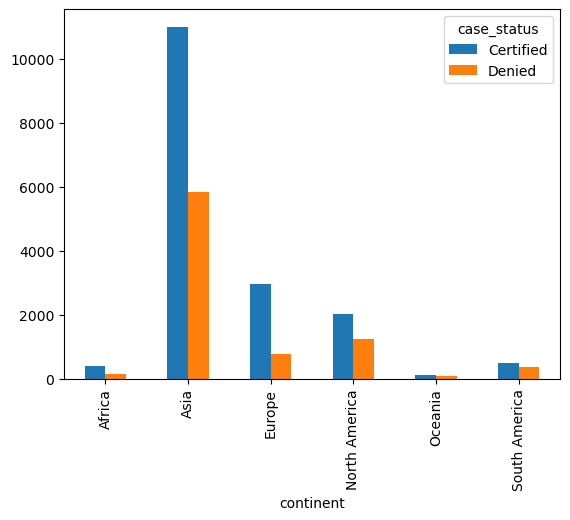

In [40]:
result1.plot(kind='bar')

In [41]:
col1=visa_df['case_status']
col2=visa_df['continent']
result_1=pd.crosstab(col1,col2)
result_1

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='case_status'>

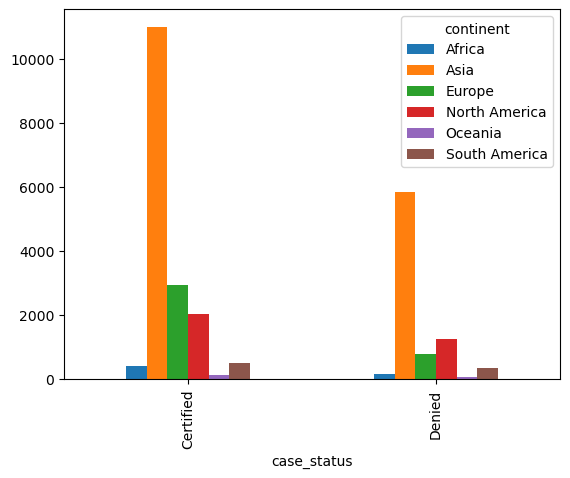

In [42]:
result_1.plot(kind='bar')

In [43]:
# using list of columns
col1=[visa_df['continent'],visa_df['education_of_employee']]
col2=visa_df['case_status']
result2=pd.crosstab(col1,col2)
result2

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

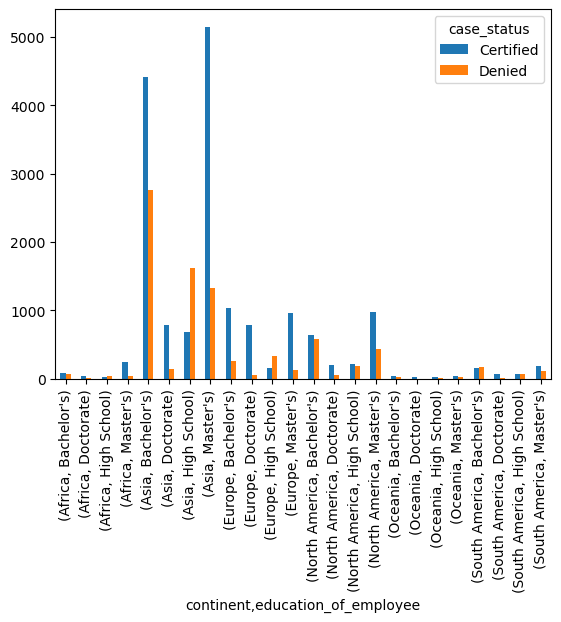

In [44]:
result2.plot(kind='bar')

In [51]:
# using list of columns
col1=[visa_df['continent'],visa_df['education_of_employee'],visa_df['region_of_employment']]
col2=visa_df['case_status']
result_2=pd.crosstab(col1,col2)
result_2

case_status                                               Certified  Denied
continent     education_of_employee region_of_employment                   
Africa        Bachelor's            Island                        0       1
                                    Midwest                      11       7
                                    Northeast                    29      26
                                    South                        23      10
                                    West                         18      18
...                                                             ...     ...
South America Master's              Island                        6       7
                                    Midwest                      33      11
                                    Northeast                    55      31
                                    South                        51      22
                                    West                         39      38

[118 rows x 2 columns]

<Axes: xlabel='continent,education_of_employee,region_of_employment'>

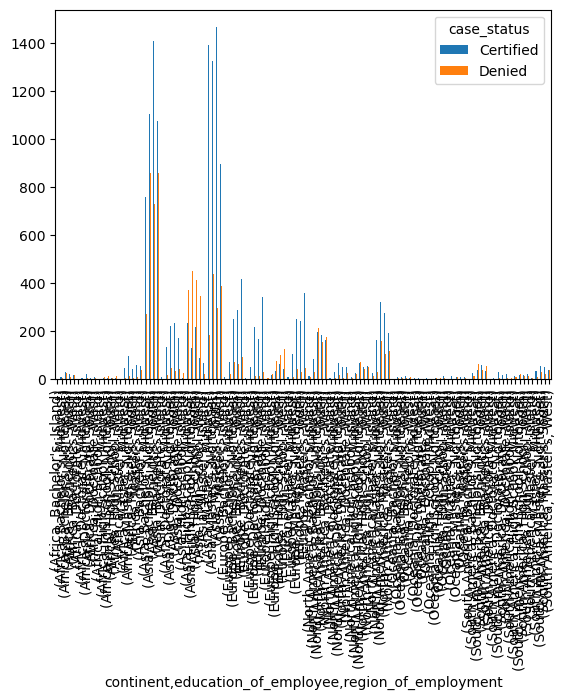

In [54]:

result_2.plot(kind='bar')